In [66]:
import numpy as np
import pandas as pd
import seaborn as sns 
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from plotly.offline import plot, iplot
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

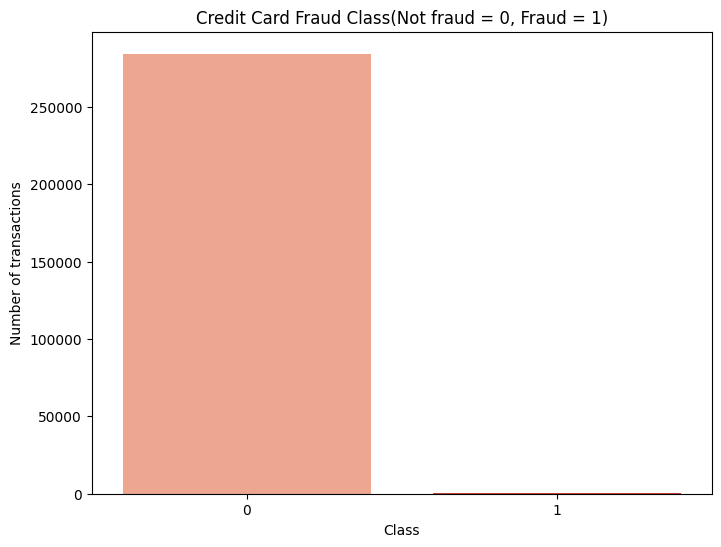

In [10]:
temp = data["Class"].value_counts().reset_index()
temp.columns = ['Class', 'values']

plt.figure(figsize=(8, 6))
sns.barplot(x='Class', y='values', data=temp, palette='Reds')
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.title('Credit Card Fraud Class(Not fraud = 0, Fraud = 1)')
plt.show()

In [13]:
fraud = data[data['Class'] == 1]['Time']
valid = data[data['Class'] == 0]['Time']

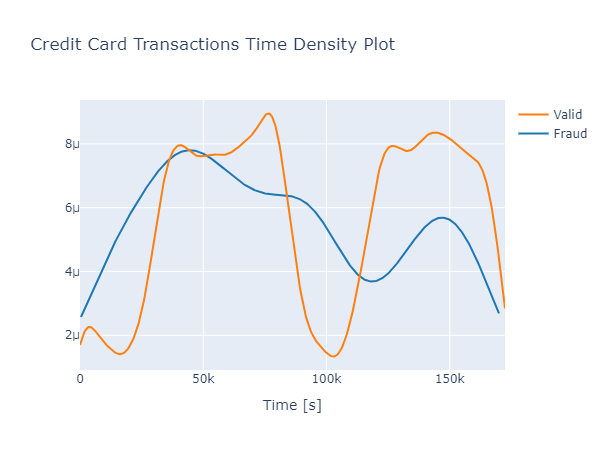

In [16]:
hist_data = [fraud, valid]
group_labels = ['Fraud', 'Valid']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

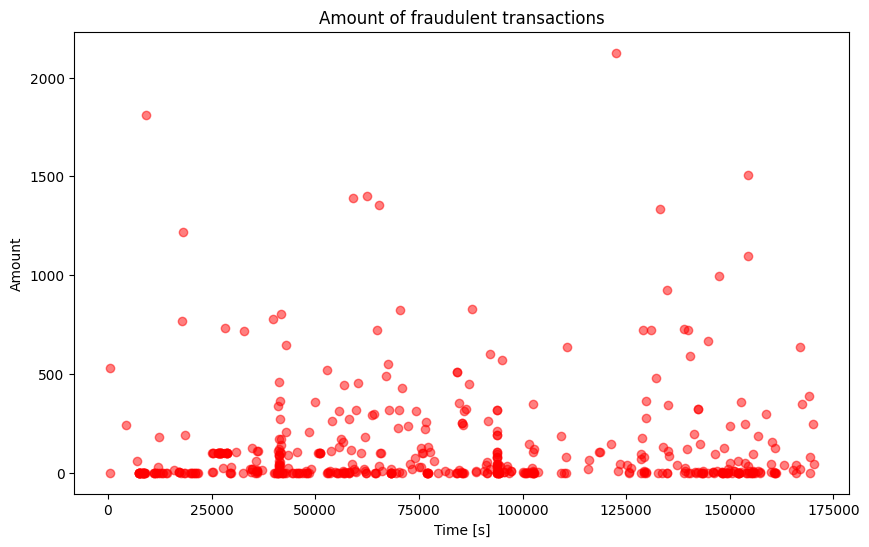

In [19]:
fraud = data[data['Class'] == 1]

plt.figure(figsize=(10, 6))
plt.scatter(fraud['Time'], fraud['Amount'], color='red', alpha=0.5)
plt.title('Amount of fraudulent transactions')
plt.xlabel('Time [s]')
plt.ylabel('Amount')
plt.show()

<Axes: >

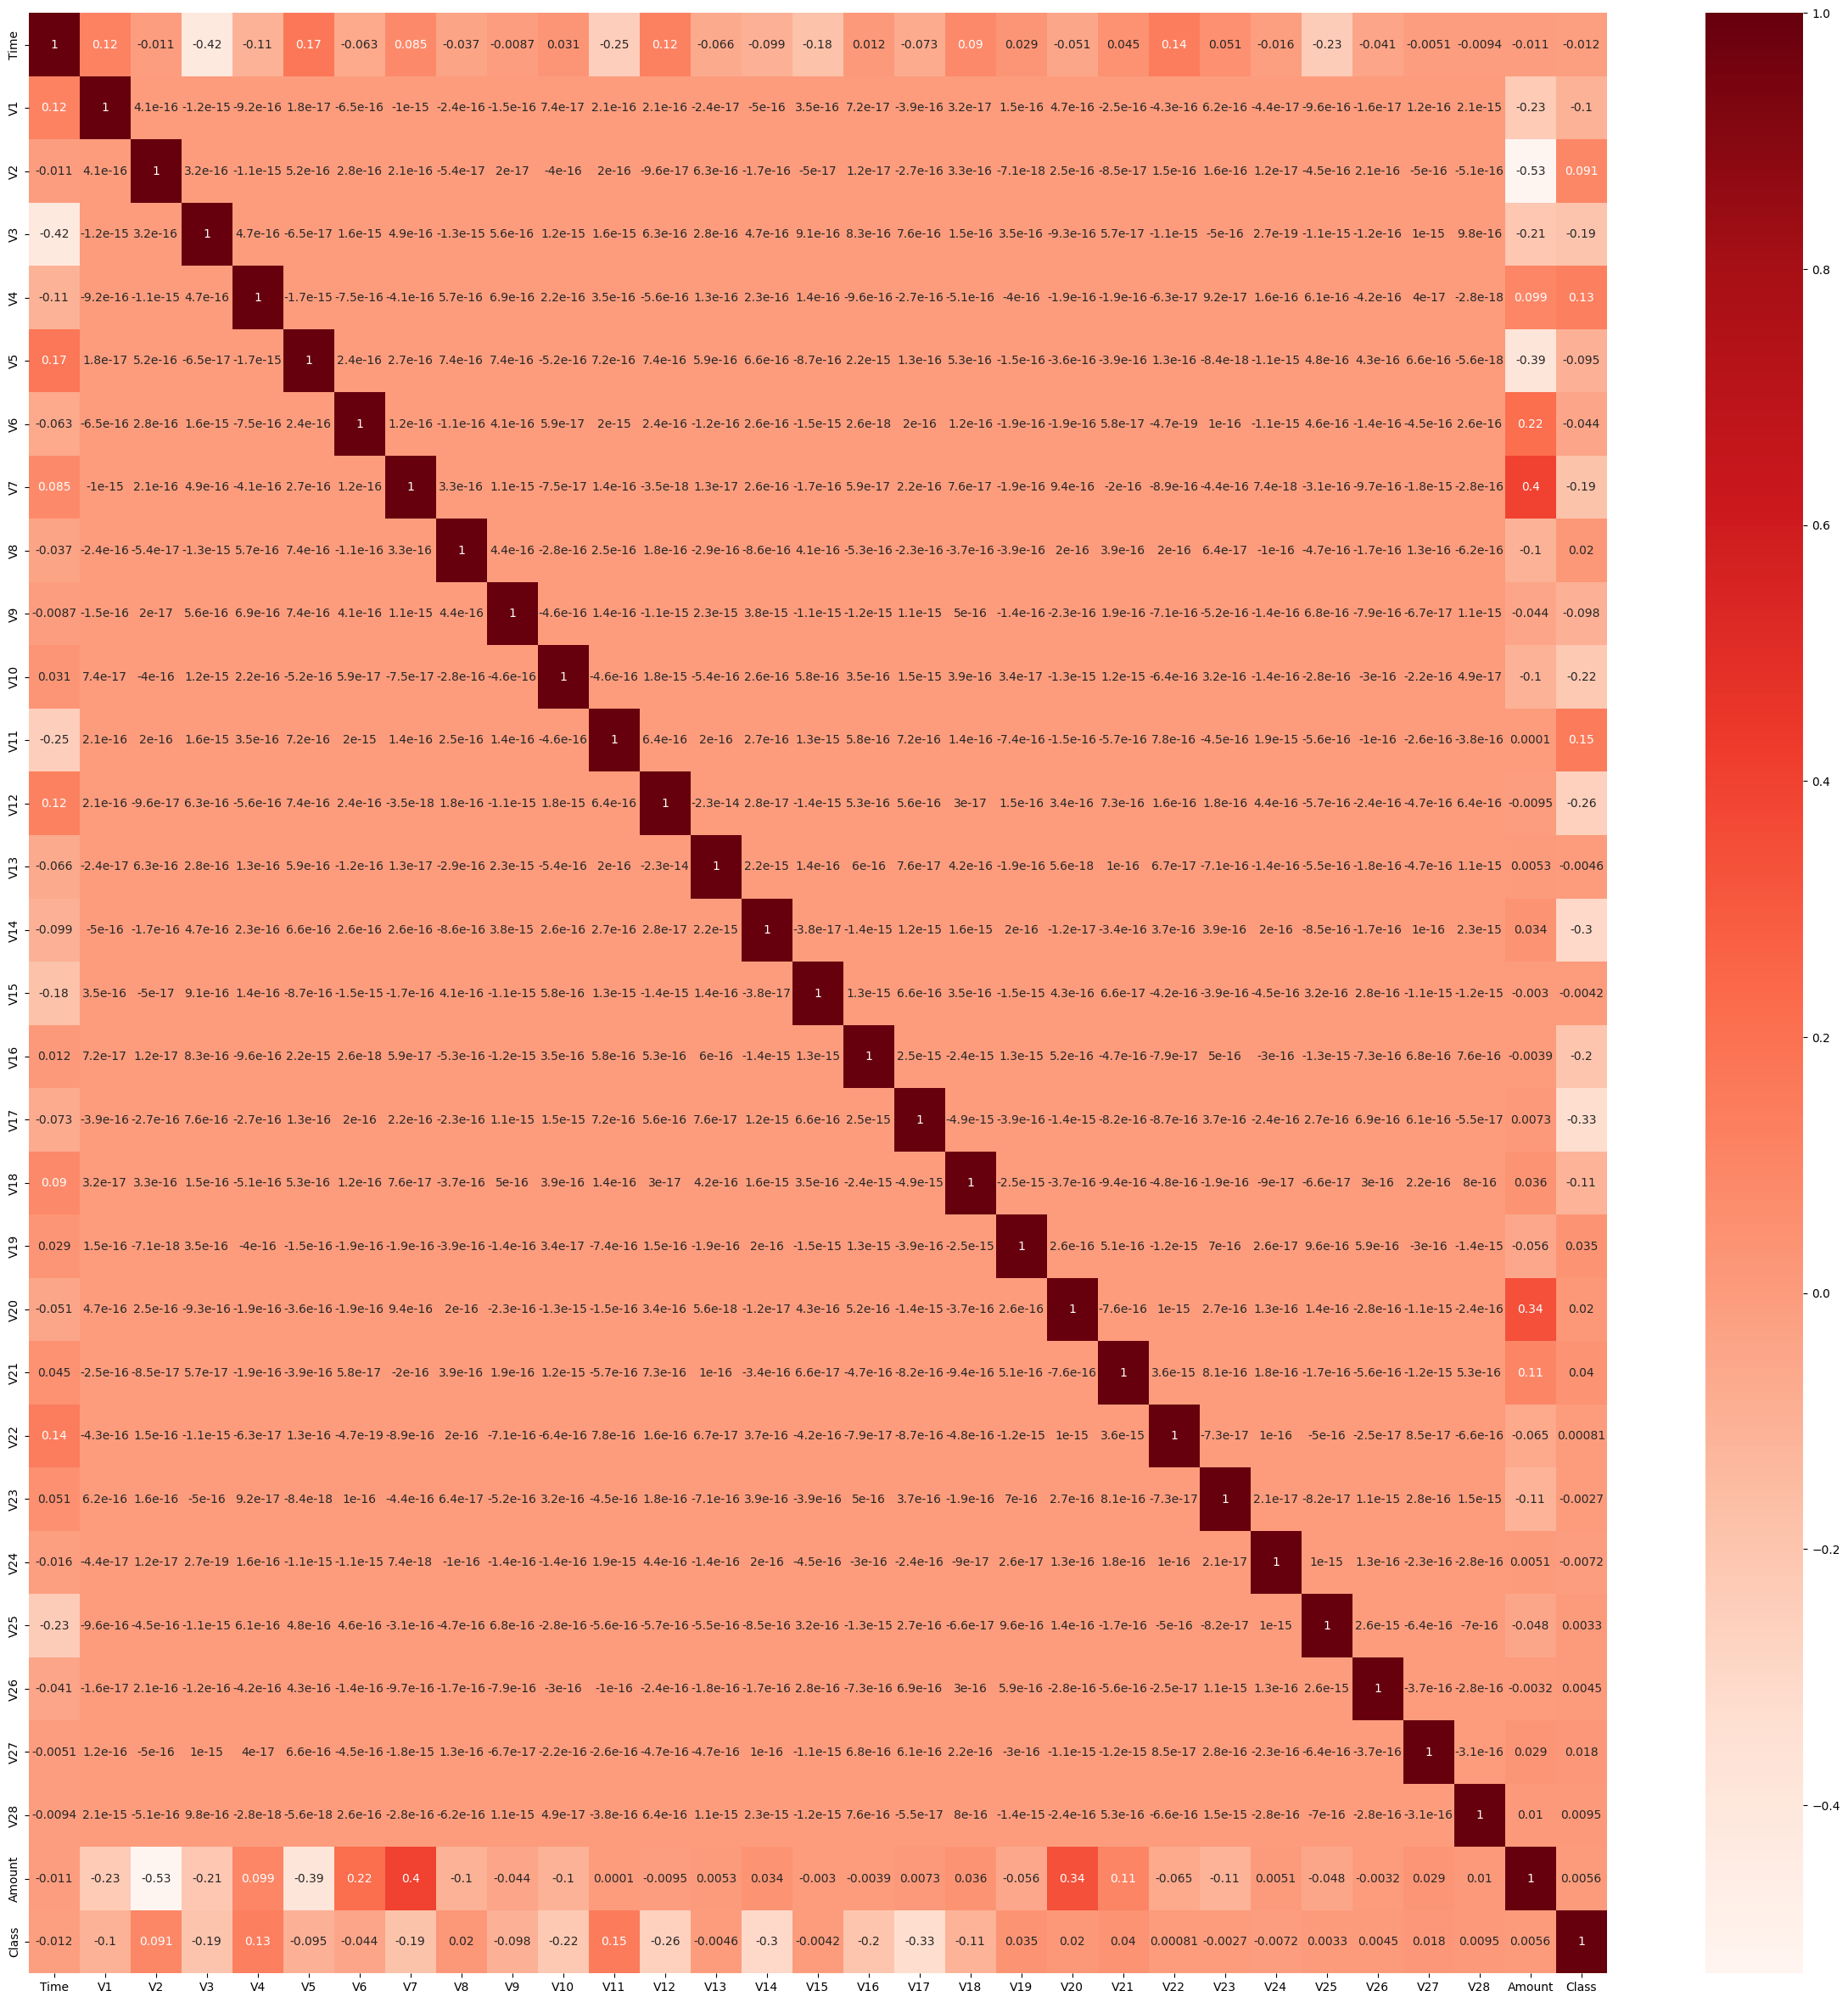

In [23]:
plt.figure(figsize = (30,30))

corr = data.corr()
sns.heatmap(corr,annot = True,cmap="Reds")


In [51]:
X = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']
Y = 'Class'

In [29]:
train, test = train_test_split(data, test_size = 0.2, 
                               random_state=2018, shuffle = True)
train, validation = train_test_split(train, test_size = 0.2, 
                                    random_state = 2018, shuffle=True)

In [32]:
X_train = train.drop('Class', axis=1)
y_train = train['Class']
X_validation = validation.drop('Class', axis=1)
y_validation = validation['Class']
X_test = test.drop('Class', axis=1)
y_test = test['Class']

# RandomForestClassifier

In [28]:
model_rf = RandomForestClassifier(n_jobs = 4, 
                                  random_state=2018, 
                                  criterion='gini',
                                  n_estimators=100, 
                                  verbose=False)

In [34]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

In [35]:
pred_rf = model_rf.predict(X_validation)
print(f"Validation accuracy: {model_rf.score(X_validation, y_validation)}")

Validation accuracy: 0.999188044503939


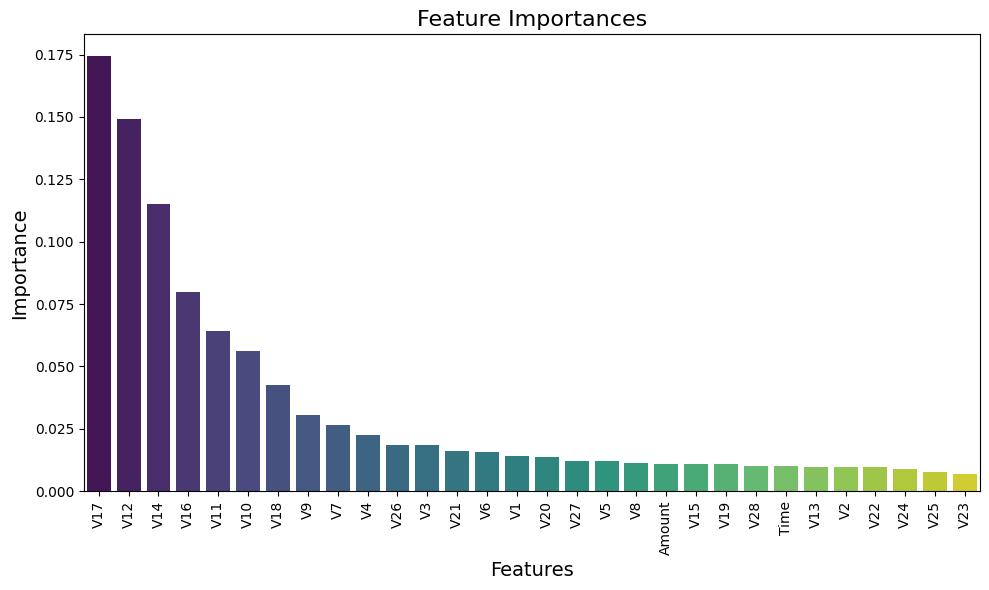

In [52]:
feature_importances = pd.DataFrame({
    'Feature': X,
    'Importance': model_rf.feature_importances_
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.title('Feature Importances', fontsize=16)
sns.barplot(x='Feature', y='Importance', data=feature_importances, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.tight_layout()
plt.show()


In [53]:
roc_auc = roc_auc_score(y_validation, pred_rf)
print(f"ROC AUC Score: {roc_auc}")

ROC AUC Score: 0.8528641975628091


# AdaBoostClassifier

In [54]:
model_abc = AdaBoostClassifier(random_state=2018,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                         n_estimators=100)

In [55]:
model_abc.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=2018)

In [56]:
pred_abc = model_abc.predict(X_validation)
print(f"Validation accuracy: {model_abc.score(X_validation, y_validation)}")

Validation accuracy: 0.9990563760451184


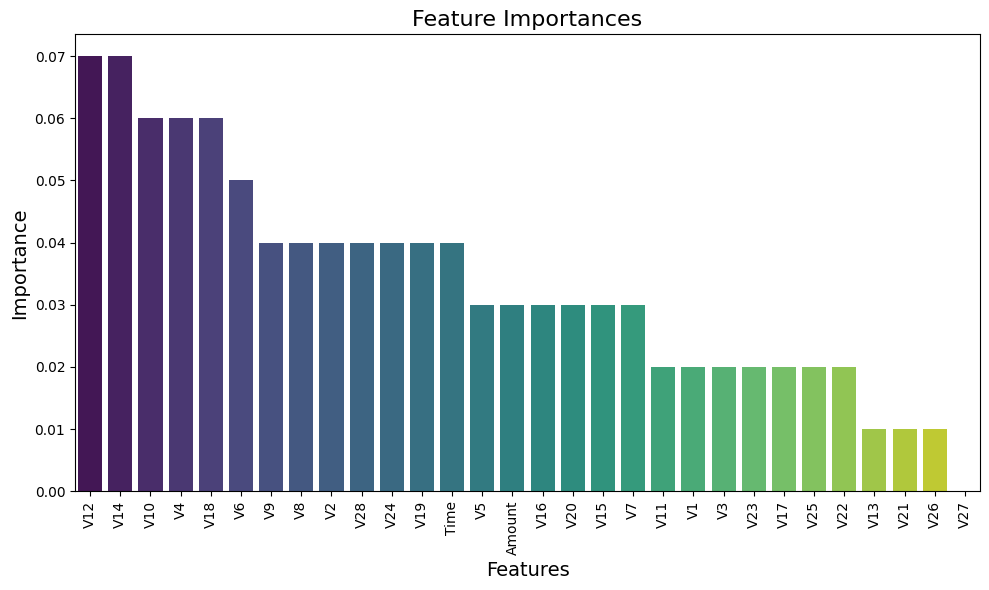

In [57]:
feature_importances = pd.DataFrame({
    'Feature': X,
    'Importance': model_abc.feature_importances_
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.title('Feature Importances', fontsize=16)
sns.barplot(x='Feature', y='Importance', data=feature_importances, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.tight_layout()
plt.show()


In [58]:
roc_auc = roc_auc_score(y_validation, pred_abc)
print(f"ROC AUC Score: {roc_auc}")

ROC AUC Score: 0.8332343604519027


# CatBoostClassifier

In [59]:
model_cbc = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = 2018,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=100)

In [60]:
model_cbc.fit(X_train, y_train)

0:	total: 349ms	remaining: 2m 54s
50:	total: 14.2s	remaining: 2m 4s
100:	total: 27.6s	remaining: 1m 49s
150:	total: 41.7s	remaining: 1m 36s
200:	total: 55s	remaining: 1m 21s
250:	total: 1m 9s	remaining: 1m 8s
300:	total: 1m 22s	remaining: 54.6s
350:	total: 1m 35s	remaining: 40.7s
400:	total: 1m 49s	remaining: 27s
450:	total: 2m 2s	remaining: 13.4s
499:	total: 2m 16s	remaining: 0us


In [61]:
pred_cbc = model_cbc.predict(X_validation)
print(f"Validation accuracy: {model_cbc.score(X_validation, y_validation)}")

Validation accuracy: 0.9992758234764862


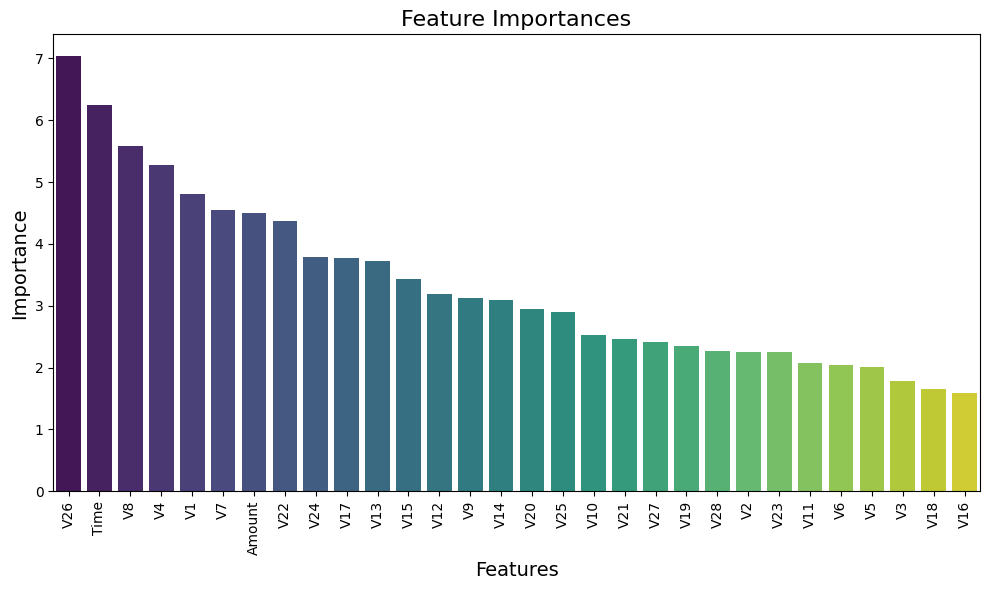

In [62]:
feature_importances = pd.DataFrame({
    'Feature': X,
    'Importance': model_cbc.feature_importances_
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.title('Feature Importances', fontsize=16)
sns.barplot(x='Feature', y='Importance', data=feature_importances, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.tight_layout()
plt.show()


In [63]:
roc_auc = roc_auc_score(y_validation, pred_cbc)
print(f"ROC AUC Score: {roc_auc}")

ROC AUC Score: 0.8577991493075996
